In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from nitty_gitty import Tensor

def plot_activation_and_grad(activation_fn, name, xmin=-5, xmax=5, step=0.1, args={}):
    x = np.arange(xmin, xmax, step)

    x_tensor = np.array(x[np.newaxis, ...], dtype=np.float32)

    x_tensor = Tensor(x_tensor, requires_grad=True)
    y = activation_fn(x_tensor)
    y.sum().backward()
    grad_y = x_tensor.grad
    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(x, y.data[0], label='Forward')
    plt.plot(x, grad_y[0], label='Gradient', linestyle='--')
    plt.title(f"{name} Activation and Gradient")
    plt.legend()
    plt.grid(True)
    plt.show()


In [2]:
def plot_grad_scale(grad, name):    
    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(grad.shape[0]), grad, label='Forward')

    plt.title(f"{name} grad scale")
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
from nitty_gitty.ops import activation_op
from nitty_gitty import Tensor
import nitty_gitty.nn.functional as F


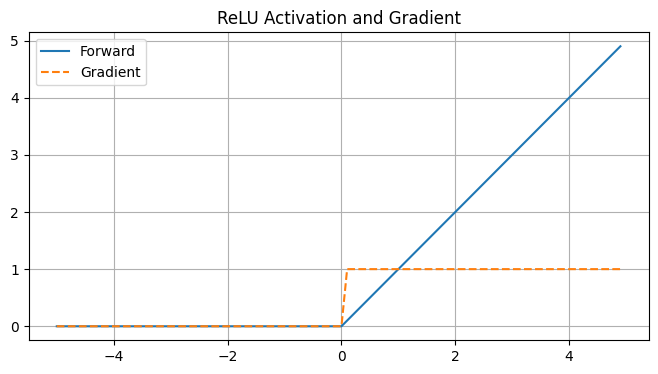

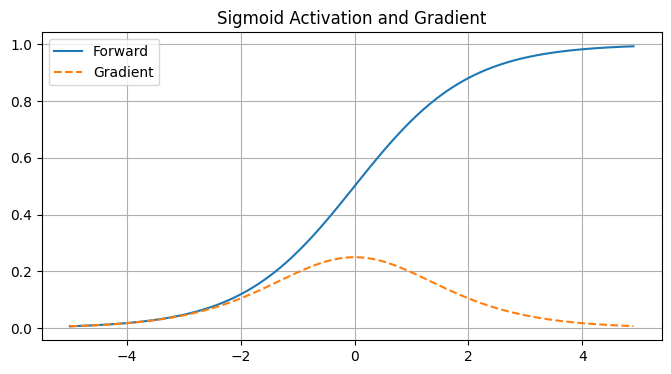

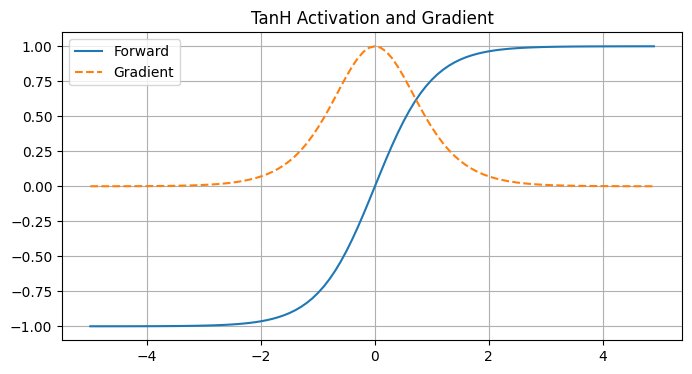

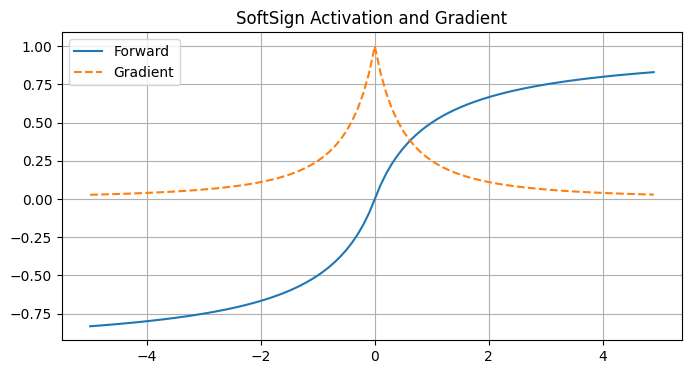

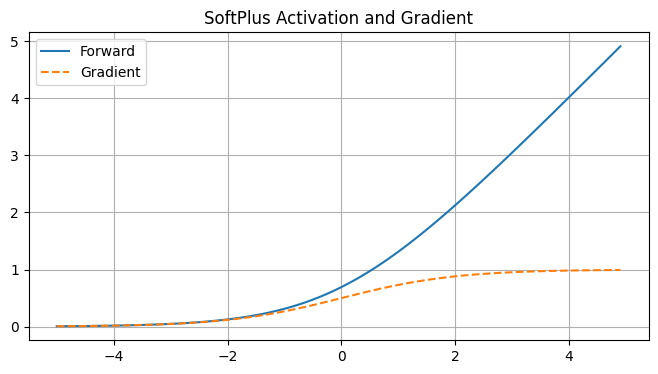

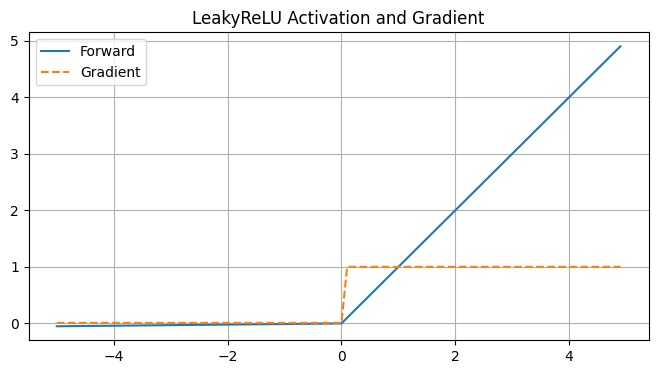

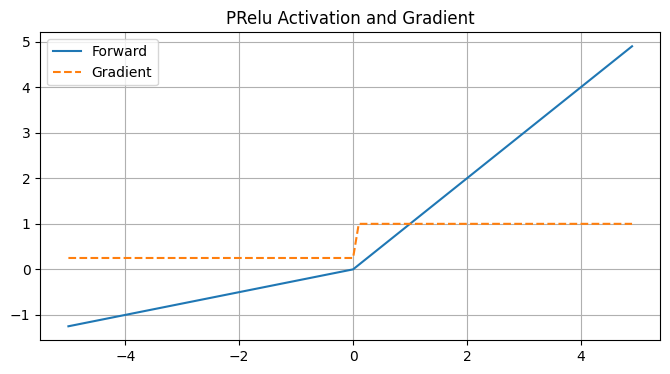

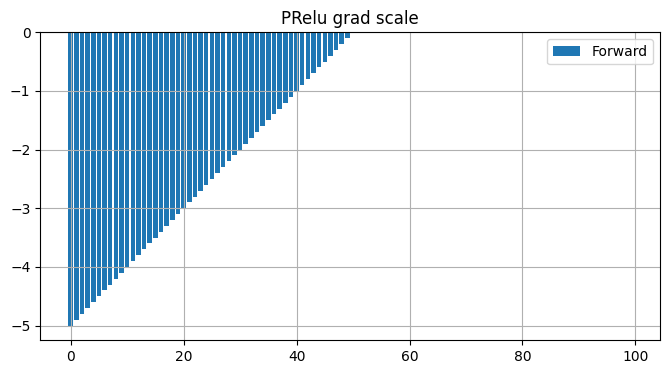

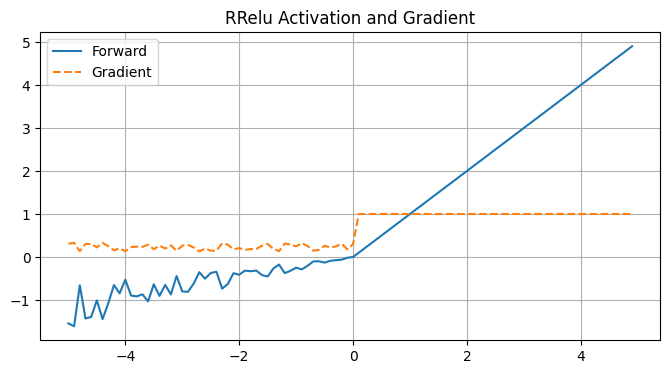

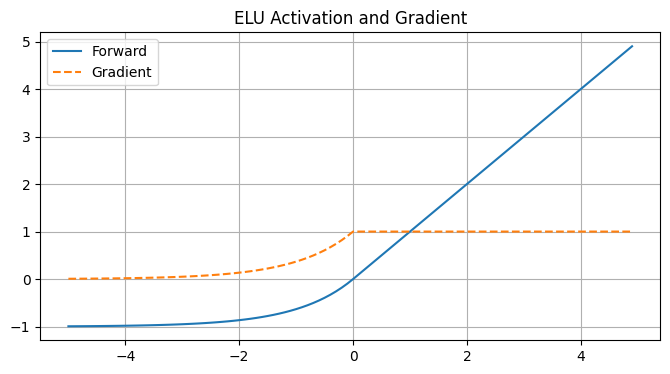

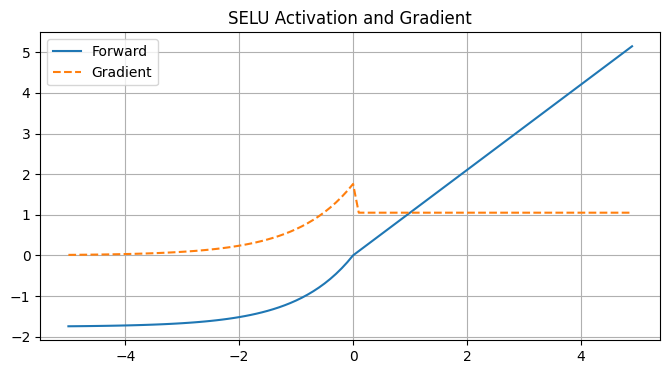

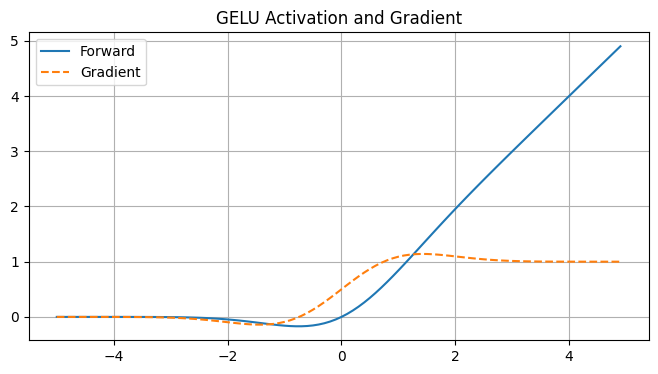

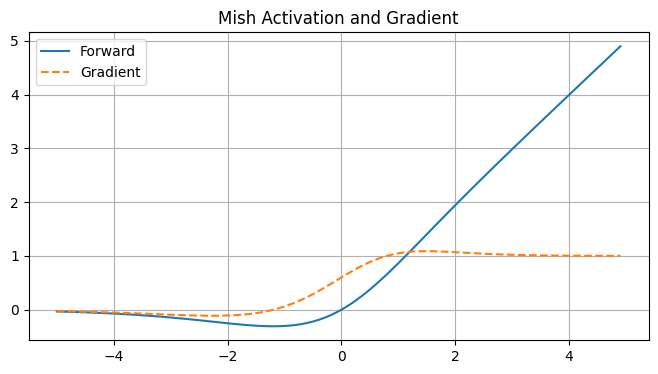

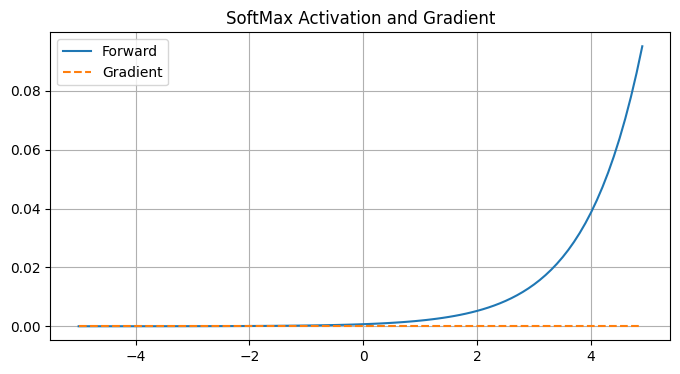

In [4]:
plot_activation_and_grad(F.ReLU(), name="ReLU")
plot_activation_and_grad(F.Sigmoid(), name="Sigmoid")
plot_activation_and_grad(F.TanH(), name="TanH")
plot_activation_and_grad(F.SoftSign(), name="SoftSign")
plot_activation_and_grad(F.SoftPlus(), name="SoftPlus")
plot_activation_and_grad(F.LeakyReLU(), name="LeakyReLU")

prelu = F.PReLU(num_parameters=100)
plot_activation_and_grad(prelu, name="PRelu")
plot_grad_scale(prelu.weight.grad, name="PRelu")

plot_activation_and_grad(F.RReLU(), name="RRelu", args={"r_value": 0.1})
plot_activation_and_grad(F.Elu(), name="ELU")
plot_activation_and_grad(F.SeLU(), name="SELU")
plot_activation_and_grad(F.GeLU(), name="GELU")
plot_activation_and_grad(F.Mish(), name="Mish")
plot_activation_and_grad(F.SoftMax(), name="SoftMax")